## PROJECT 01

### by Eli Dow


## Part One: Classifying Review Sentiment with Bag-of-Words Features

### Import required libraries

In [86]:
import os
import numpy as np
import pandas as pd

import warnings

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
import seaborn as sns

import matplotlib.pyplot as plt

import sklearn.tree

from sklearn.neural_network import MLPClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/edow1720/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/edow1720/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [87]:
x_train = pd.read_csv('data_reviews/x_train.csv')
y_train = pd.read_csv('data_reviews/y_train.csv')

x_test = pd.read_csv('data_reviews/x_test.csv')

x_text_train = x_train['text'].values.tolist()
x_text_test = x_test['text'].values.tolist()

In [88]:
contractions = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "i would",
"i'll" : "i will",
"i'm" : "i am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "i have",
"let's" : "let us",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"wasn't": "was not",
"we'd" : "we would",
"we'll":" will",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
}

In [89]:
warnings.filterwarnings('ignore', category=UserWarning, append=True)
def preprocess_data(review_data):
    ''' Preprocesses review list with a variety of methods
    
    Args
    ----
    input_data : 1D array of strings
        Each entry consists of a string review

    Returns
    -------
    preprocessed : 2D array of word lists
        Each entry consists of a list of words
    '''
    
    processed = []
    
    # convert text to lower case
    for text in review_data:
        processed.append(text.lower())
    
    # convert words with contractions to original words
    originals = []
    for text in processed:
        words = text.split()
        reformed = []
        
        for word in words:
            if word in contractions:
                reformed.append(contractions[word])
            else:
                reformed.append(word)
                
        reformed = " ".join(reformed)
        originals.append(reformed)

    # tokenize data by converting text to tokens (words split up)
    tokenized = []
    for text in originals:
        tokenized.append(word_tokenize(text))

    # remove stopwords (words most commonly used but not relevant in the context of data)
    stop_words = set(stopwords.words('english'))
    for text in tokenized:
        for token in text:
            if token in stop_words:
                text.remove(token)

    # removes stand-alone punctuation and hyphens between words
    stripped = []
    for text in tokenized:
        words = []
        for word in text:
            if word.isalpha():
                words.append(word)
            elif '-' in word and '--' not in word:
                if len(word.replace('-','')) != 0 and word.replace('-','').isalpha():
                    words.append(word.replace('-',''))
                    
        stripped.append(words)
    
    '''
    lemmafied = []
    lemmatizer = WordNetLemmatizer()
    for text in stripped:
        lemm = []
        for word in text:
            lemm.append(lemmatizer.lemmatize(word))
        lemmafied.append(lemm)
    
    '''
    lemmafied = []
    porter = PorterStemmer()
    for text in stripped:
        lemm = []
        for word in text:
            lemm.append(porter.stem(word))
        lemmafied.append(lemm)
    
    # put back into sentences
    processed = []
    for text in lemmafied:
        sentence = " ".join(text)
        processed.append(sentence)

    return processed

### 1.1. Explanation for Pipeline that Generates Bag-of-Words Features

In [90]:
# use counting vectorizer to count unique words before preprocessing
cv = CountVectorizer()
word_count_train = cv.fit_transform(x_text_train)
word_count_test = cv.fit_transform(x_text_test)
print(word_count_train.shape)
print(word_count_test.shape)

# initialize vectorizer
vectorizer = TfidfVectorizer()

# preprocess training and testing data
print(x_text_train[0:4])
x_train_processed = preprocess_data(x_text_train)
print(x_train_processed[0:4])
x_test_processed = preprocess_data(x_text_test)

# transform training and testing data
x_train_transformed = vectorizer.fit_transform(x_train_processed)
x_test_transformed = vectorizer.transform(x_test_processed)

# use counting vectorizer to count unique words after preprocessing
word_count_train = cv.fit_transform(x_train_processed)
word_count_test = cv.fit_transform(x_test_processed)
print(word_count_train.shape)
print(word_count_test.shape)

(2400, 4510)
(600, 1921)
['Oh and I forgot to also mention the weird color effect it has on your phone.', "THAT one didn't work either.", 'Waste of 13 bucks.', 'Product is useless, since it does not have enough charging current to charge the 2 cellphones I was planning to use it with.']
['oh i forgot also mention weird color effect ha your phone', 'one not work either', 'wast buck', 'product useless sinc doe have enough charg current charg cellphon wa plan use with']
(2400, 3518)
(600, 1589)


### 1.2. Logistic Regression Model for Feature Data

BEST SCORE: 
0.8004166666666667


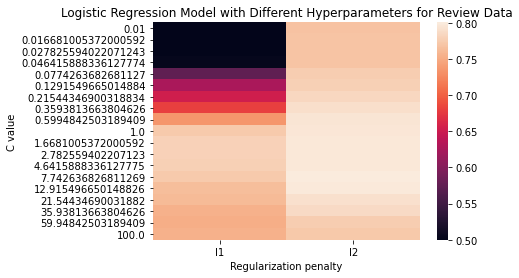

In [137]:

def logistic_regression(training_input, training_output, testing_input):
    ''' Performs logistic regression on feature data representing website reviews
    
    Args
    ----
    training_input : 1D array of review training data
        Each entry consists of a string review
    training_output : 1D array of floats
        Each entry represents the binary value (0 or 1) that says whether the sentiment is positive or negative
    testing_input : 1D array of review testing data
        Each entry consists of a string review

    Returns
    -------
    Nothing : 
        Creates txt file yproba1_test.txt
        txt file represents one probability value per line/example from testing set
        
    '''

    log_reg = LogisticRegression(solver='liblinear')
    # Grid Search for Hyperparameters
    C = np.logspace(-2, 2, 19)
    penalty = ['l2', 'l1']
    hyperparams = dict(C=C, penalty=penalty)
    clf = GridSearchCV(log_reg, hyperparams, cv=5, verbose=0)
    clf.fit(training_input, training_output)

    print("BEST SCORE: ")
    print(clf.best_score_)
    '''
    print("STANDARD DEVIATIONS")
    print(clf.cv_results_['std_test_score'])
    print("STANDARD DEVIATION FOR BEST SCORE:")
    print(clf.cv_results_['std_test_score'][clf.best_index_])
    '''

    pivot = pd.pivot_table(pd.DataFrame(clf.cv_results_), values='mean_test_score', index='param_C', columns='param_penalty')
    ax = sns.heatmap(pivot)
    ax.set_title("Logistic Regression Model with Different Hyperparameters for Review Data")
    ax.set_ylabel("C value")
    ax.set_xlabel("Regularization penalty")
    
     # calculating logistic loss
    probability = clf.predict_proba(testing_input)[:, 1]
    
    # save to txt file
    np.savetxt('yproba1_test.txt', probability)
    
    return

logistic_regression(x_train_transformed, y_train, x_test_transformed)


### 1.3. Neural Network Model for Feature Data

BEST SCORE: 
0.7945833333333334
STANDARD DEVIATIONS
[0.01256925 0.01627669 0.01396921 0.01608355 0.01121135 0.02038688
 0.01595349 0.09433245 0.01533197 0.0183995  0.01627669 0.01457738
 0.01671867 0.01818119 0.01280191 0.01750992]
STANDARD DEVIATION FOR BEST SCORE:
0.017509917824542264


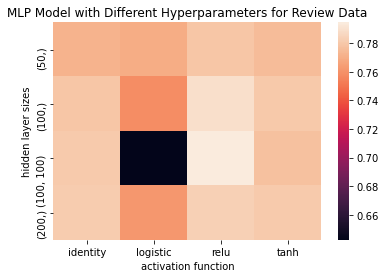

In [135]:
def MLP(training_input, training_output, testing_input):
    ''' Performs mlp classifier on feature data representing website reviews
    
    Args
    ----
    training_input : 1D array of review training data
        Each entry consists of a string review
    training_output : 1D array of floats
        Each entry represents the binary value (0 or 1) that says whether the sentiment is positive or negative
    testing_input : 1D array of review testing data
        Each entry consists of a string review

    Returns
    -------
    Nothing : 
        Creates txt file yproba1_test.txt
        txt file represents one probability value per line/example from testing set
        
    '''
        
    mlp = MLPClassifier(max_iter=10)

    hyperparams = {
        'hidden_layer_sizes': [(100,), (200,), (50,), (100,100)],
        'activation': ['identity','logistic', 'tanh', 'relu'],
    }

    clf = GridSearchCV(mlp, hyperparams, cv=5, verbose=0)
    clf.fit(training_input, training_output.values.ravel())
    
    

    print("BEST SCORE: ")
    print(clf.best_score_)
    print("STANDARD DEVIATIONS")
    print(clf.cv_results_['std_test_score'])
    print("STANDARD DEVIATION FOR BEST SCORE:")
    print(clf.cv_results_['std_test_score'][clf.best_index_])

    pivot_mlp = pd.pivot_table(pd.DataFrame(clf.cv_results_), values='mean_test_score', index='param_hidden_layer_sizes', columns='param_activation')
    ax_mlp = sns.heatmap(pivot_mlp)
    ax_mlp.set_title("MLP Model with Different Hyperparameters for Review Data")
    ax_mlp.set_xlabel("activation function")
    ax_mlp.set_ylabel("hidden layer sizes")
    
    # calculating logistic loss
    probability = clf.predict_proba(testing_input)[:, 1]
    
    # save to txt file
    np.savetxt('yproba1_test.txt', probability)
    
    return

MLP(x_train_transformed, y_train, x_test_transformed)

### 1.4. Decision Tree Model for Feature Data

BEST SCORE: 
0.74875
STANDARD DEVIATIONS
[0.03455069 0.02917857 0.03255871 0.03141899 0.02695804 0.03266518
 0.03048793 0.03552679 0.03746758 0.03683201 0.03365986 0.03678957]
STANDARD DEVIATION FOR BEST SCORE:
0.02695804353270302


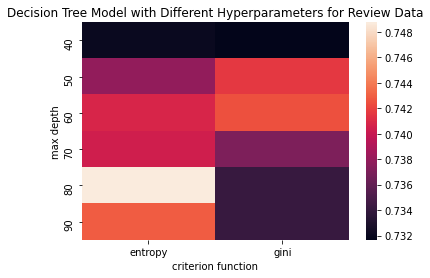

In [136]:
def DecisionTree(training_input, training_output, testing_input):
    ''' Performs decision tree on feature data representing website reviews
    
    Args
    ----
    training_input : 1D array of review training data
        Each entry consists of a string review
    training_output : 1D array of floats
        Each entry represents the binary value (0 or 1) that says whether the sentiment is positive or negative
    testing_input : 1D array of review testing data
        Each entry consists of a string review

    Returns
    -------
    Nothing : 
        Creates txt file yproba1_test.txt
        txt file represents one probability value per line/example from testing set
        
    '''
        
    simple_clf = sklearn.tree.DecisionTreeClassifier()

    hyperparams = {
        'criterion': ["entropy", "gini"],
        'max_depth': [40, 50, 60, 70, 80, 90]
    }

    clf = GridSearchCV(simple_clf, hyperparams, cv=5, verbose=0)
    clf.fit(training_input, training_output)
    
    

    print("BEST SCORE: ")
    print(clf.best_score_)
    print("STANDARD DEVIATIONS")
    print(clf.cv_results_['std_test_score'])
    print("STANDARD DEVIATION FOR BEST SCORE:")
    print(clf.cv_results_['std_test_score'][clf.best_index_])

    pivot_clf = pd.pivot_table(pd.DataFrame(clf.cv_results_), values='mean_test_score', index='param_max_depth', columns='param_criterion')
    ax_clf = sns.heatmap(pivot_clf)
    ax_clf.set_title("Decision Tree Model with Different Hyperparameters for Review Data")
    ax_clf.set_ylabel("max depth")
    ax_clf.set_xlabel("criterion function")
    
    # calculating logistic loss
    probability = clf.predict_proba(testing_input)[:, 1]
    
    # save to txt file
    np.savetxt('yproba1_test.txt', probability)
    
    return

DecisionTree(x_train_transformed, y_train, x_test_transformed)